In [2]:
# Build a DataFrame from raw log lines (use raw values from chat or from run_2.log if available)
from pathlib import Path
import pandas as pd

# Raw excerpt (copied from chat/log). If you have run_2.log available it will be used instead.
raw_text = '''
[2025-11-23 21:13:49] 
[2025-11-23 21:13:49] Greedy:
[2025-11-23 21:13:49] ----------------------------------------
[2025-11-23 21:14:16]   Budget = 1: seeds=['blog.myspace.com'] DL=0.074 DT=95.7 PA=3.5
[2025-11-23 21:15:08]   Budget = 2: seeds=['blog.myspace.com', 'us.rd.yahoo.com'] DL=0.125 DT=91.0 PA=3.2
[2025-11-23 21:16:25]   Budget = 3: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'in.news.yahoo.com'] DL=0.136 DT=89.9 PA=3.2
[2025-11-23 21:18:11]   Budget = 4: seeds=['us.rd.yahoo.com', 'blog.myspace.com', 'news.originalsignal.com']... DL=0.148 DT=88.8 PA=3.1
[2025-11-23 21:20:18]   Budget = 5: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'news.com.au']... DL=0.147 DT=88.9 PA=3.2
[2025-11-23 21:22:56]   Budget = 6: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'uk.news.yahoo.com']... DL=0.156 DT=88.1 PA=3.1
[2025-11-23 21:25:59]   Budget = 7: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'buzz.originalsignal.com']... DL=0.164 DT=87.3 PA=3.1
[2025-11-23 21:29:37]   Budget = 8: seeds=['blog.myspace.com', 'uk.news.yahoo.com', 'news.originalsignal.com']... DL=0.175 DT=86.2 PA=3.1
[2025-11-23 21:33:36]   Budget = 9: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'press-release-depot.com']... DL=0.178 DT=85.8 PA=3.1
[2025-11-23 21:38:14]   Budget = 10: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'usatoday.com']... DL=0.186 DT=85.1 PA=3.1
[2025-11-23 21:38:14] 
[2025-11-23 21:38:14] Out-Degree:
[2025-11-23 21:38:14] ----------------------------------------
[2025-11-23 21:38:16]   Budget = 1: seeds=['tiffadeauxtimes.com'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:18]   Budget = 2: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:20]   Budget = 3: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:22]   Budget = 4: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:24]   Budget = 5: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:26]   Budget = 6: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:28]   Budget = 7: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:29]   Budget = 8: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:31]   Budget = 9: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:33]   Budget = 10: seeds=['tiffadeauxtimes.com', 'tarotgirl.wordpress.com', 'popandi.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:38:33] 
[2025-11-23 21:38:33] In-Degree:
[2025-11-23 21:38:33] ----------------------------------------
[2025-11-23 21:38:36]   Budget = 1: seeds=['blog.myspace.com'] DL=0.074 DT=95.7 PA=3.5
[2025-11-23 21:38:38]   Budget = 2: seeds=['blog.myspace.com', 'yelp.com'] DL=0.076 DT=95.7 PA=3.5
[2025-11-23 21:38:41]   Budget = 3: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com'] DL=0.126 DT=90.9 PA=3.2
[2025-11-23 21:38:44]   Budget = 4: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.130 DT=90.7 PA=3.2
[2025-11-23 21:38:46]   Budget = 5: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.145 DT=89.3 PA=3.2
[2025-11-23 21:38:49]   Budget = 6: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.147 DT=89.2 PA=3.2
[2025-11-23 21:38:51]   Budget = 7: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.154 DT=88.6 PA=3.1
[2025-11-23 21:38:54]   Budget = 8: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.159 DT=88.1 PA=3.1
[2025-11-23 21:38:56]   Budget = 9: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.166 DT=87.5 PA=3.1
[2025-11-23 21:38:59]   Budget = 10: seeds=['blog.myspace.com', 'yelp.com', 'us.rd.yahoo.com']... DL=0.170 DT=87.2 PA=3.1
[2025-11-23 21:38:59] 
[2025-11-23 21:38:59] PageRank:
[2025-11-23 21:38:59] ----------------------------------------
[2025-11-23 21:40:07]   Budget = 1: seeds=['blog.myspace.com'] DL=0.074 DT=95.7 PA=3.5
[2025-11-23 21:41:15]   Budget = 2: seeds=['blog.myspace.com', 'seattletimes.nwsource.com'] DL=0.089 DT=94.4 PA=3.4
[2025-11-23 21:42:23]   Budget = 3: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com'] DL=0.095 DT=93.9 PA=3.4
[2025-11-23 21:43:32]   Budget = 4: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.137 DT=89.9 PA=3.2
[2025-11-23 21:44:40]   Budget = 5: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.144 DT=89.2 PA=3.1
[2025-11-23 21:45:49]   Budget = 6: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.154 DT=88.3 PA=3.1
[2025-11-23 21:47:00]   Budget = 7: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.170 DT=86.9 PA=3.1
[2025-11-23 21:48:10]   Budget = 8: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.173 DT=86.6 PA=3.1
[2025-11-23 21:49:19]   Budget = 9: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.184 DT=85.5 PA=3.1
[2025-11-23 21:50:29]   Budget = 10: seeds=['blog.myspace.com', 'seattletimes.nwsource.com', 'buzz.originalsignal.com']... DL=0.194 DT=84.6 PA=3.0
[2025-11-23 21:50:29] 
[2025-11-23 21:50:29] Betweenness:
[2025-11-23 21:50:29] ----------------------------------------
[2025-11-23 21:51:06]   Budget = 1: seeds=['uk.news.yahoo.com'] DL=0.019 DT=98.2 PA=3.8
[2025-11-23 21:51:35]   Budget = 2: seeds=['strategist.org.uk', 'carolinevirginia.wordpress.com'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:52:17]   Budget = 3: seeds=['davidhewlett.tarlanx.com', 'wraithbait.com', 'techtam.wordpress.com'] DL=0.001 DT=99.9 PA=3.9
[2025-11-23 21:52:55]   Budget = 4: seeds=['blogs.periodistadigital.com', 'rajeev2004.blogspot.com', 'elrastreadoronline.com']... DL=0.001 DT=100.0 PA=3.9
[2025-11-23 21:53:39]   Budget = 5: seeds=['cheatcc.com', 'rss.feedsportal.com', 'planetphillip.com']... DL=0.018 DT=98.5 PA=3.9
[2025-11-23 21:54:17]   Budget = 6: seeds=['blogsdeguatemala.com', 'stormyscorner.com', 'pizquita.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:54:52]   Budget = 7: seeds=['2brightsparks.com', 'remoteshoppe.com', 'vice.typepad.com']... DL=0.001 DT=100.0 PA=3.9
[2025-11-23 21:55:33]   Budget = 8: seeds=['slidingintohome.blogspot.com', 'feeds.nydailynews.com', 'bronxstop.blogspot.com']... DL=0.006 DT=99.5 PA=3.9
[2025-11-23 21:56:15]   Budget = 9: seeds=['gayfictionexcerpts.wordpress.com', 'netimperative.com', 'fincipit.it']... DL=0.001 DT=99.9 PA=3.9
[2025-11-23 21:56:50]   Budget = 10: seeds=['davidhewlett.tarlanx.com', 'us.rd.yahoo.com', 'uk.news.yahoo.com']... DL=0.086 DT=92.3 PA=3.4
[2025-11-23 21:56:50] 
[2025-11-23 21:56:50] Random:
[2025-11-23 21:56:50] ----------------------------------------
[2025-11-23 21:56:52]   Budget = 1: seeds=['blog.tamkhane.net'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:56:53]   Budget = 2: seeds=['publicite.groups.vox.com', 'mixednuts.typepad.com'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:56:55]   Budget = 3: seeds=['visiondejuego.wordpress.com', 'justsalvosaus.blogspot.com', 'jamespearson.typepad.com'] DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:56:57]   Budget = 4: seeds=['elliottaylor.wordpress.com', 'eddywaves.wordpress.com', 'burningworld.blogspot.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:56:58]   Budget = 5: seeds=['youtublejobisjo.spaces.live.com', 'babblingvc.typepad.com', 'halfcrazy.spaces.live.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:57:00]   Budget = 6: seeds=['venusraphael.wordpress.com', 'leonha92.wordpress.com', 'matamig.taffel.se']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:57:02]   Budget = 7: seeds=['lukeactscommentary.wordpress.com', 'taylorstuff.wordpress.com', 'lisamello.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:57:03]   Budget = 8: seeds=['mickerman63.typepad.com', 'kuke.wordpress.com', 'chuvakin.blogspot.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:57:05]   Budget = 9: seeds=['mll55.ycool.com', 'thethirdeye.org', 'recyclingtoday.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:57:07]   Budget = 10: seeds=['chelaners.wordpress.com', 'stephenschenkenberg.com', 'opt1lc.wordpress.com']... DL=0.000 DT=100.0 PA=3.9
[2025-11-23 21:57:07] 
[2025-11-23 21:57:07] CELF:
[2025-11-23 21:57:07] ----------------------------------------
[2025-11-23 21:57:36]   Budget = 1: seeds=['blog.myspace.com'] DL=0.074 DT=95.7 PA=3.5
[2025-11-23 21:58:03]   Budget = 2: seeds=['blog.myspace.com', 'us.rd.yahoo.com'] DL=0.125 DT=91.0 PA=3.2
[2025-11-23 21:58:30]   Budget = 3: seeds=['blog.myspace.com', 'c.moreover.com', 'news.theage.com.au'] DL=0.099 DT=93.4 PA=3.4
[2025-11-23 21:58:59]   Budget = 4: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'c.moreover.com']... DL=0.134 DT=90.1 PA=3.2
[2025-11-23 21:59:27]   Budget = 5: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'uk.news.yahoo.com']... DL=0.153 DT=88.2 PA=3.1
[2025-11-23 21:59:55]   Budget = 6: seeds=['us.rd.yahoo.com', 'blog.myspace.com', 'news.bbc.co.uk']... DL=0.160 DT=87.7 PA=3.1
[2025-11-23 22:00:23]   Budget = 7: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'scouty.de']... DL=0.178 DT=86.0 PA=3.1
[2025-11-23 22:00:52]   Budget = 8: seeds=['us.rd.yahoo.com', 'blog.myspace.com', 'news.originalsignal.com']... DL=0.180 DT=85.8 PA=3.1
[2025-11-23 22:01:20]   Budget = 9: seeds=['us.rd.yahoo.com', 'blog.myspace.com', 'news.com.au']... DL=0.188 DT=85.0 PA=3.1
[2025-11-23 22:01:49]   Budget = 10: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'rss.feedsportal.com']... DL=0.187 DT=85.2 PA=3.1
[2025-11-23 22:01:49] 
[2025-11-23 22:01:49] CELF++:
[2025-11-23 22:01:49] ----------------------------------------
[2025-11-23 22:02:15]   Budget = 1: seeds=['blog.myspace.com'] DL=0.074 DT=95.7 PA=3.5
[2025-11-23 22:02:41]   Budget = 2: seeds=['blog.myspace.com', 'us.rd.yahoo.com'] DL=0.125 DT=91.0 PA=3.2
[2025-11-23 22:03:12]   Budget = 3: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'in.news.yahoo.com'] DL=0.136 DT=89.9 PA=3.2
[2025-11-23 22:03:40]   Budget = 4: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'pr-inside.com']... DL=0.146 DT=89.0 PA=3.2
[2025-11-23 22:04:07]   Budget = 5: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'scouty.de']... DL=0.155 DT=88.2 PA=3.2
[2025-11-23 22:04:35]   Budget = 6: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'scouty.de']... DL=0.165 DT=87.3 PA=3.1
[2025-11-23 22:05:05]   Budget = 7: seeds=['blog.myspace.com', 'rss.feedsportal.com', 'us.rd.yahoo.com']... DL=0.166 DT=87.2 PA=3.1
[2025-11-23 22:05:33]   Budget = 8: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'fr.news.yahoo.com']... DL=0.168 DT=86.9 PA=3.1
[2025-11-23 22:06:04]   Budget = 9: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'in.news.yahoo.com']... DL=0.182 DT=85.5 PA=3.1
[2025-11-23 22:06:33]   Budget = 10: seeds=['blog.myspace.com', 'us.rd.yahoo.com', 'in.news.yahoo.com']... DL=0.179 DT=86.1 PA=3.1
'''

# Prefer reading real log file if present (overrides raw_text)
log_path = Path('run_2.log')
if log_path.exists():
    raw_text = log_path.read_text(encoding='utf-8', errors='ignore')

lines = [l.rstrip() for l in raw_text.splitlines()]
rows = []
current_alg = None
for line in lines:
    s = line.strip()
    if not s:
        continue
    # Algorithm header lines end with ':' e.g. 'Greedy:' or '[ts] Greedy:'
    if s.endswith(':') and 'Budget' not in s:
        # extract algorithm name after ']' if timestamp present
        if ']' in s:
            alg = s.split(']')[-1].strip().rstrip(':')
        else:
            alg = s.rstrip(':')
        current_alg = alg
        continue
    if 'Budget =' in line and current_alg is not None:
        # simple substring parsing (no regex)
        try:
            budget_part = line.split('Budget', 1)[1]
            budget = int(budget_part.split('=')[1].split(':')[0].strip())
        except Exception:
            continue
        dl = dt = pa = None
        for token in line.replace(',', ' ').split():
            if token.startswith('DL='):
                try:
                    dl = float(token.split('DL=')[1])
                except Exception:
                    pass
            if token.startswith('DT='):
                try:
                    dt = float(token.split('DT=')[1])
                except Exception:
                    pass
            if token.startswith('PA='):
                try:
                    pa = float(token.split('PA=')[1])
                except Exception:
                    pass
        if dl is not None and dt is not None and pa is not None:
            rows.append({'algorithm': current_alg, 'budget': budget, 'DL': dl, 'DT': dt, 'PA': pa})

# Fallback: lines like 'Greedy (k=10): DL=0.188 DT_red=0.150 PA=0.2'
for line in lines:
    if 'DL=' in line and '(k=' in line:
        # extract algorithm name before '('
        left = line.split('(')[0]
        if ']' in left:
            alg = left.split(']')[-1].strip()
        else:
            alg = left.strip()
        try:
            kpart = line.split('(k=')[1]
            budget = int(kpart.split(')')[0])
        except Exception:
            continue
        dl = dt = pa = None
        for token in line.replace(',', ' ').split():
            if token.startswith('DL='):
                dl = float(token.split('DL=')[1])
            if token.startswith('DT_red=') or token.startswith('DT='):
                dt = float(token.split('=')[1])
            if token.startswith('PA='):
                pa = float(token.split('PA=')[1])
        if dl is not None and dt is not None and pa is not None:
            rows.append({'algorithm': alg, 'budget': budget, 'DL': dl, 'DT': dt, 'PA': pa})

df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError('No metric lines parsed. Check that raw_text or run_2.log contain the expected lines.')
df = df.drop_duplicates(subset=['algorithm','budget']).sort_values(['algorithm','budget']).reset_index(drop=True)
print('Parsed rows:', len(df))
df.head(40)

Parsed rows: 80


,algorithm,budget,DL,DT,PA
0,Betweenness,1,0.019,98.2,3.8
1,Betweenness,2,0.000,100.0,3.9
2,Betweenness,3,0.001,99.9,3.9
3,Betweenness,4,0.001,100.0,3.9
4,Betweenness,5,0.018,98.5,3.9
5,Betweenness,6,0.000,100.0,3.9
6,Betweenness,7,0.001,100.0,3.9
7,Betweenness,8,0.006,99.5,3.9
8,Betweenness,9,0.001,99.9,3.9
9,Betweenness,10,0.086,92.3,3.4


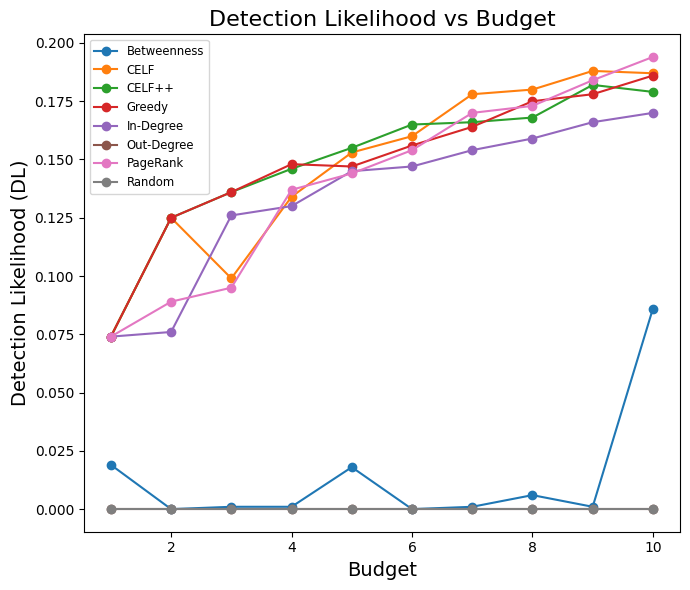

In [32]:
# Plot Detection Likelihood (DL) across budgets for all algorithms
import matplotlib.pyplot as plt
from pathlib import Path


plt.figure(figsize=(7,6))
# pivot for plotting
pivot = df.pivot(index='budget', columns='algorithm', values='DL')
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker='o', label=col)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Detection Likelihood (DL)', fontsize=14)
plt.title('Detection Likelihood vs Budget', fontsize=16)
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

In [25]:
# Compute DT reduction (default max_time=100)
max_time = 100.0
df['DT_red_frac'] = (max_time - df['DT']) / max_time
df['DT_red_pct'] = df['DT_red_frac'] * 100.0

# Optional: reduction vs Random at same budget (if Random present)
if 'Random' in df['algorithm'].unique():
    baseline = df[df['algorithm']=='Random'][['budget','DT']].rename(columns={'DT':'DT_random'})
    df = df.merge(baseline, on='budget', how='left')
    df['DT_red_vs_random_frac'] = (df['DT_random'] - df['DT']) / df['DT_random']
    df['DT_red_vs_random_pct'] = df['DT_red_vs_random_frac'] * 100.0

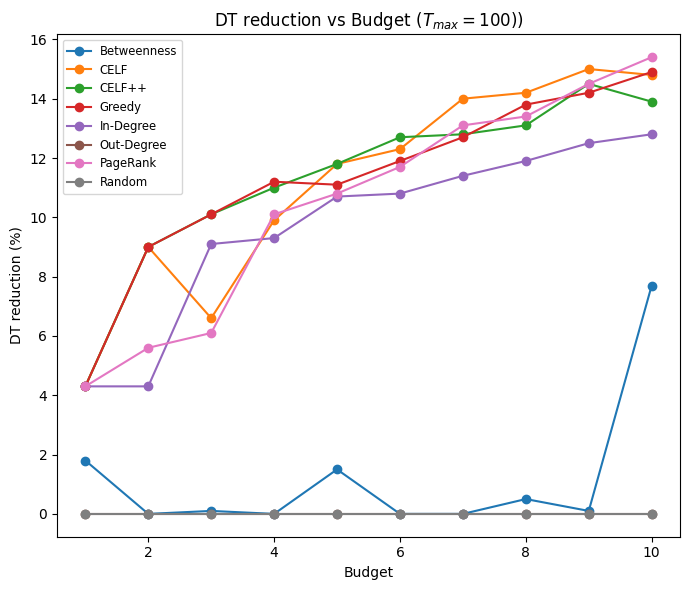

In [30]:
pivot = df.pivot(index='budget', columns='algorithm', values='DT_red_pct')
pivot.plot(marker='o', figsize=(7,6))
plt.ylabel('DT reduction (%)')
plt.xlabel('Budget')
plt.title('DT reduction vs Budget ($T_{max}=100)$)')
plt.legend(fontsize='small')
plt.tight_layout()
plt.show()